In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogLocator, FormatStrFormatter

In [5]:
# Average out results from different runs
file_pattern = 'avl_trees/del/1MB_keys/avl_tree_del_metrics_1k_*.csv'
all_files = glob.glob(file_pattern)

# Read each file into a DataFrame and store them in a list
df_list = []
for file in all_files:
    df = pd.read_csv(file)
    df_list.append(df)

# Extract the 'index' and 'duration' columns from each DataFrame
durations_list = [df[['index', 'duration']] for df in df_list]

# Combine the DataFrames by merging them on the 'index' column
combined_df = pd.concat(durations_list, axis=1)

# Calculate the mean duration for each insertion index
average_durations = combined_df.loc[:, combined_df.columns.str.contains('duration')].mean(axis=1)

# Create a DataFrame for the averaged results
averaged_df = pd.DataFrame({
    'index': combined_df['index'].iloc[:, 0],  # Use the 'index' from the first DataFrame
    'duration': average_durations
})

print(averaged_df['duration'].describe())

averaged_df.to_csv('avl_trees/del/1MB_keys/avl_tree_average_del_metrics_1k.csv', index=False)

count    1.000000e+03
mean     2.836940e+05
std      1.605398e+05
min      1.433790e+05
25%      2.146616e+05
50%      2.702291e+05
75%      3.141032e+05
max      2.488058e+06
Name: duration, dtype: float64


### Average insertion time of uuid keys in Hash Tables across 1000 operations

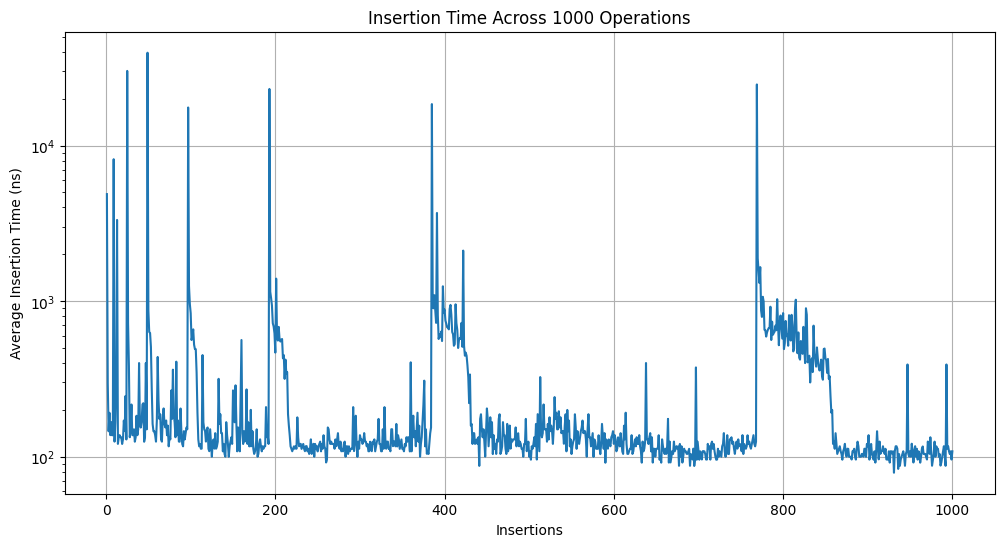

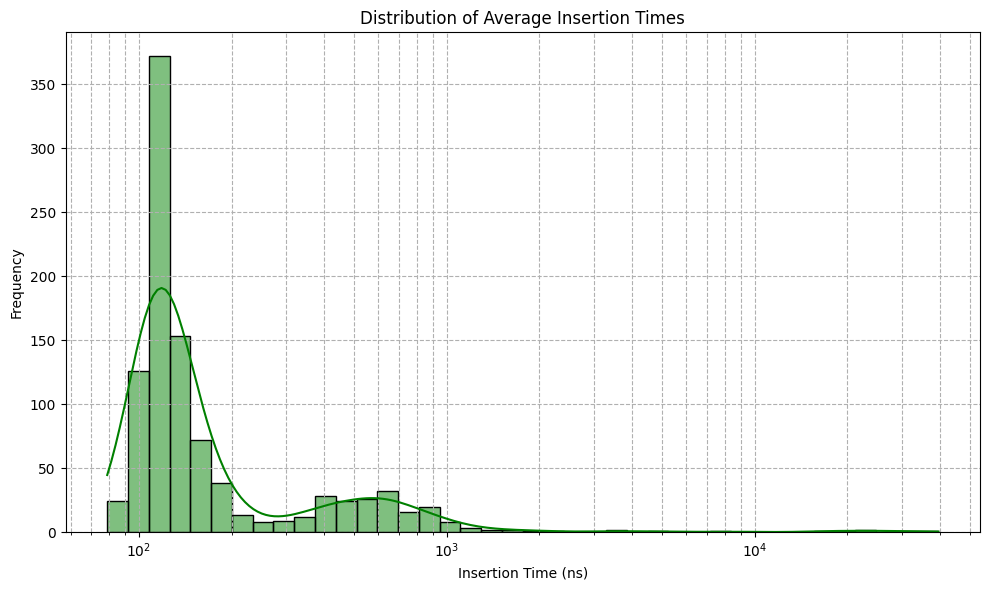

In [5]:
# Average insertion times across 1000 operations for Hash Tables

averaged_df = pd.read_csv('hash_tables/hash_table_average_set_metrics_1k.csv')

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Insertion Time Across 1000 Operations')
plt.xlabel('Insertions')
plt.ylabel('Average Insertion Time (ns)')
plt.yscale('log')
plt.grid(True)
# plt.savefig('hash_table_average_set_metrics_1k_lineplot.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
plt.title('Distribution of Average Insertion Times')
plt.xlabel('Insertion Time (ns)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
# plt.savefig('hash_table_average_set_metrics_1k_histogram.png')
plt.show()

### Average insertion time of uuid keys in AVL Trees across 1000 operations

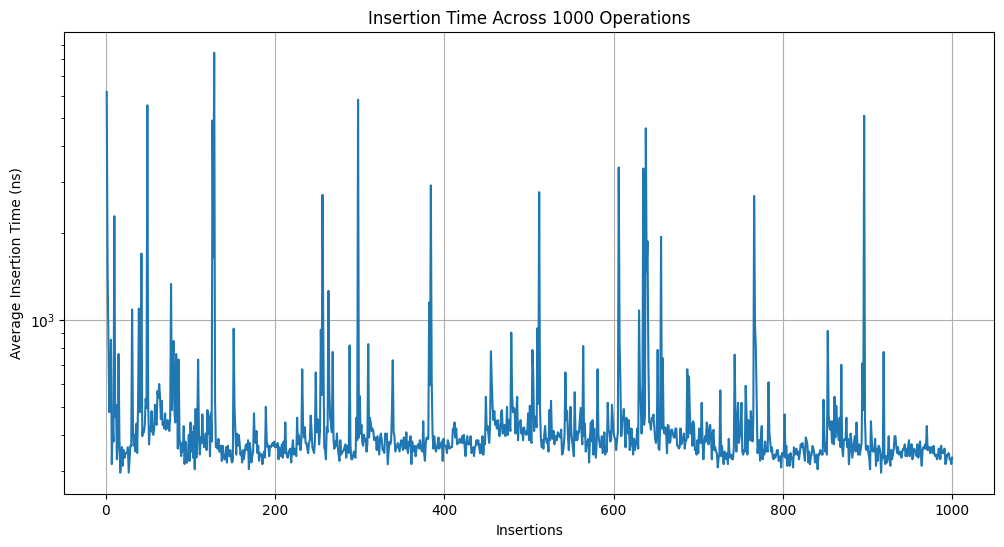

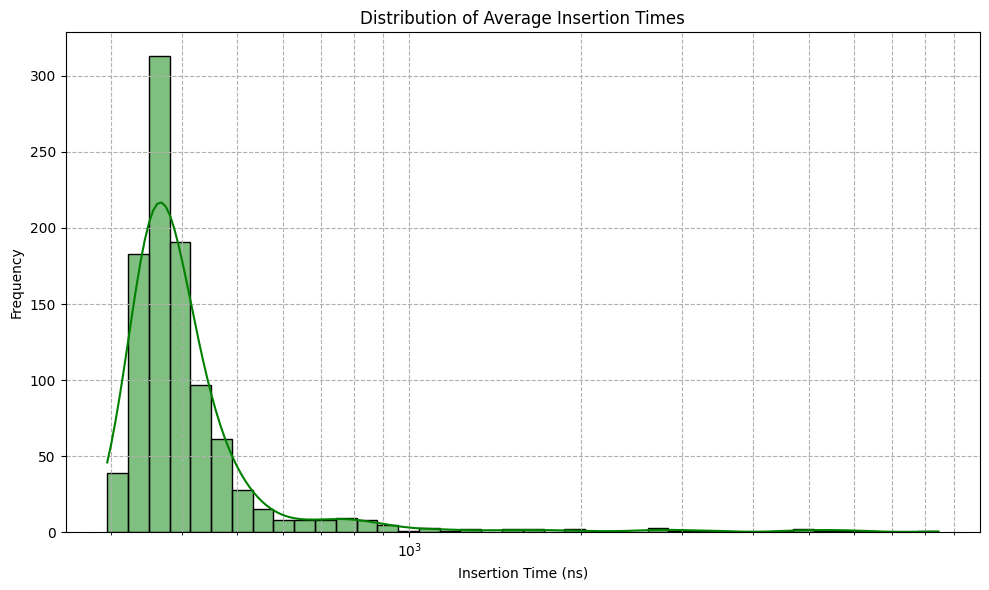

In [11]:
# Average insertion time across 1000 operations for AVL Trees

averaged_df = pd.read_csv('avl_trees/avl_tree_average_set_metrics_1k.csv')

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Insertion Time Across 1000 Operations')
plt.xlabel('Insertions')
plt.ylabel('Average Insertion Time (ns)')
plt.yscale('log')
plt.grid(True)
# plt.savefig('avl_tree_average_set_metrics_1k_lineplot.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
plt.title('Distribution of Average Insertion Times')
plt.xlabel('Insertion Time (ns)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
# plt.savefig('avl_tree_average_set_metrics_1k_histogram.png')
plt.show()

### Average insertion time of large 1MB keys in Hash Tables across 1000 operations

count      1000.000000
mean      64843.966200
std      110697.433379
min       14912.400000
25%       15819.700000
50%       16362.600000
75%       17896.000000
max      717116.400000
Name: duration, dtype: float64


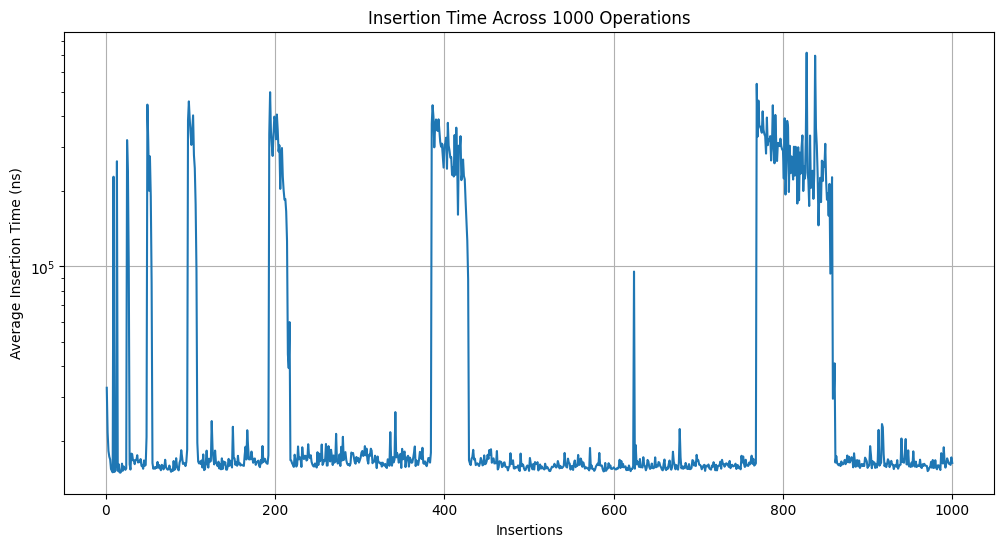

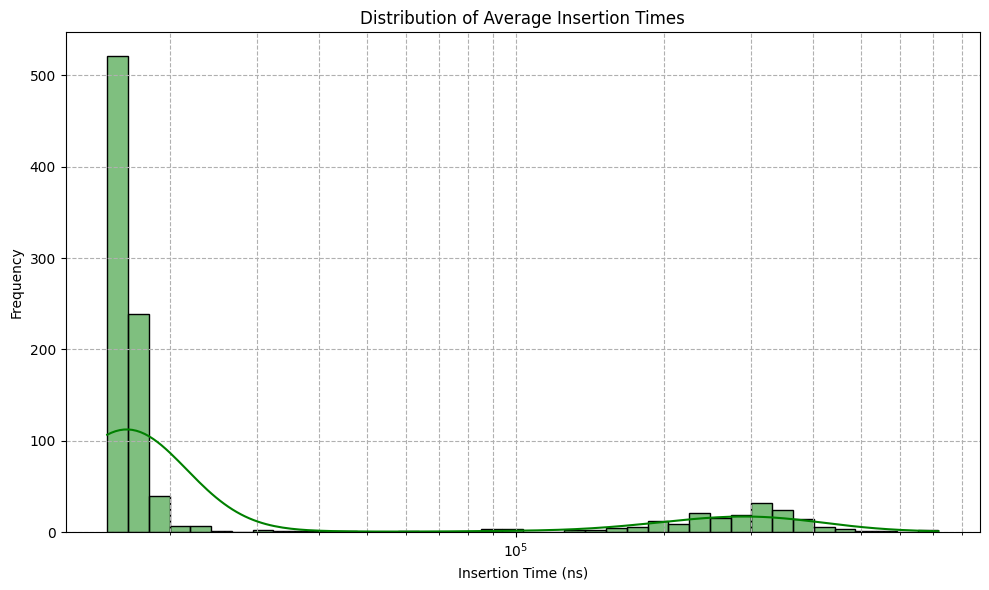

In [32]:
# Average insertion time of large 1MB keys, across 1000 operations for Hash Tables

averaged_df = pd.read_csv('hash_tables/1MB_keys/hash_table_average_set_metrics_1k.csv')

print(averaged_df['duration'].describe())

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Insertion Time Across 1000 Operations')
plt.xlabel('Insertions')
plt.ylabel('Average Insertion Time (ns)')
plt.yscale('log')
plt.grid(True)
# Set custom tick positions and labels
# ax = plt.gca()
# ax.set_yticks([10**4, 10**5])
# ax.set_yticklabels(['10^4', '10^5'])
plt.savefig('hash_table_average_set_metrics_1k_lineplot.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
plt.title('Distribution of Average Insertion Times')
plt.xlabel('Insertion Time (ns)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.savefig('hash_table_average_set_metrics_1k_histogram.png')
plt.show()

### Average insertion time of large 1MB keys in AVL Trees across 1000 operations

count     1000.000000
mean      2015.439600
std        945.500854
min        349.900000
25%       1627.950000
50%       1922.850000
75%       2281.325000
max      14804.000000
Name: duration, dtype: float64


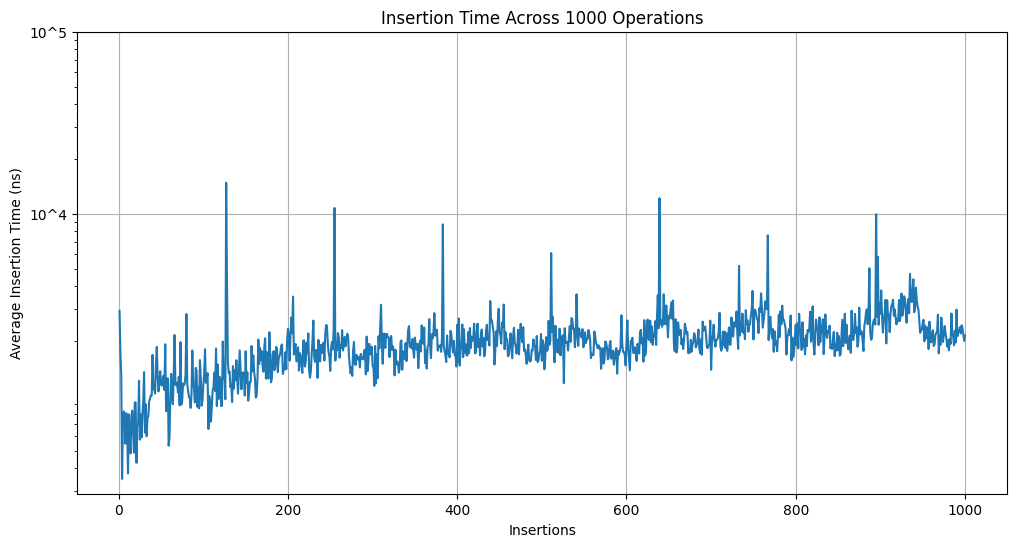

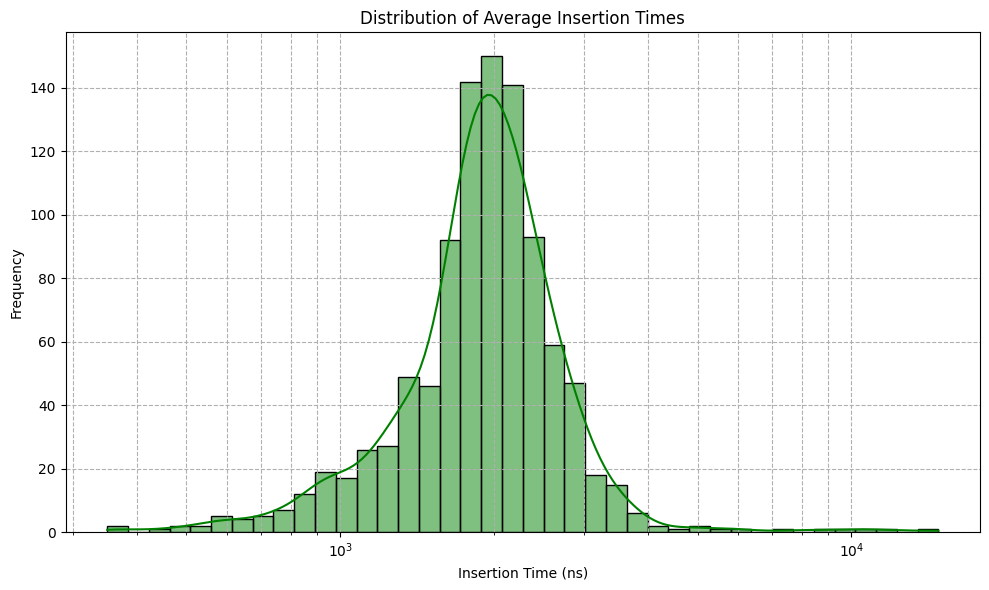

In [31]:
# Average insertion time of large 1MB keys, across 1000 operations for AVL Trees

averaged_df = pd.read_csv('avl_trees/1MB_keys/avl_tree_average_set_metrics_1k.csv')

print(averaged_df['duration'].describe())

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Insertion Time Across 1000 Operations')
plt.xlabel('Insertions')
plt.ylabel('Average Insertion Time (ns)')
plt.yscale('log')
plt.grid(True)
# Access the current axes
ax = plt.gca()
# Set custom tick positions and labels
ax.set_yticks([10**4, 10**5])
ax.set_yticklabels(['10^4', '10^5'])
plt.savefig('avl_tree_average_set_metrics_1k_lineplot.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
plt.title('Distribution of Average Insertion Times')
plt.xlabel('Insertion Time (ns)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.savefig('avl_tree_average_set_metrics_1k_histogram.png')
plt.show()

### Average search time of uuid keys in Hash tables across 1000 operations

count     1000.000000
mean       361.266800
std        890.436778
min        129.100000
25%        174.800000
50%        214.600000
75%        324.925000
max      22129.200000
Name: duration, dtype: float64


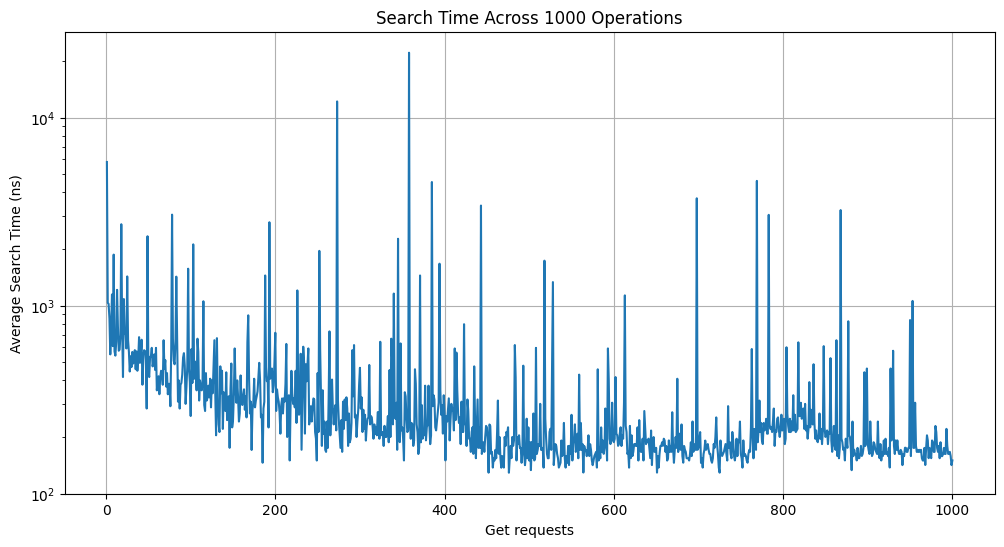

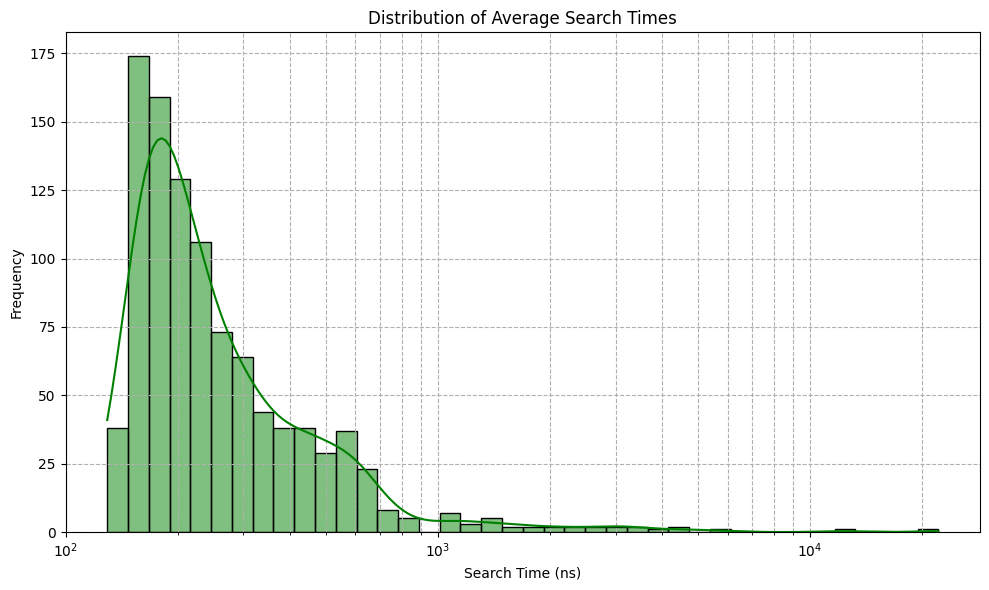

In [10]:
# Average search time of uuid keys across 1000 operations for Hash Tables

averaged_df = pd.read_csv('hash_tables/get/uuid_keys/hash_table_average_get_metrics_1k.csv')

print(averaged_df['duration'].describe())

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Search Time Across 1000 Operations')
plt.xlabel('Get requests')
plt.ylabel('Average Search Time (ns)')
plt.yscale('log')
plt.grid(True)
plt.savefig('hash_table_average_get_metrics_1k_lineplot.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
plt.title('Distribution of Average Search Times')
plt.xlabel('Search Time (ns)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.savefig('hash_table_average_get_metrics_1k_histogram.png')
plt.show()

### Average search time of uuid keys in AVL Trees across 1000 operations

count     1000.000000
mean       605.009700
std       1993.204771
min        291.600000
25%        358.200000
50%        391.600000
75%        470.925000
max      52858.400000
Name: duration, dtype: float64


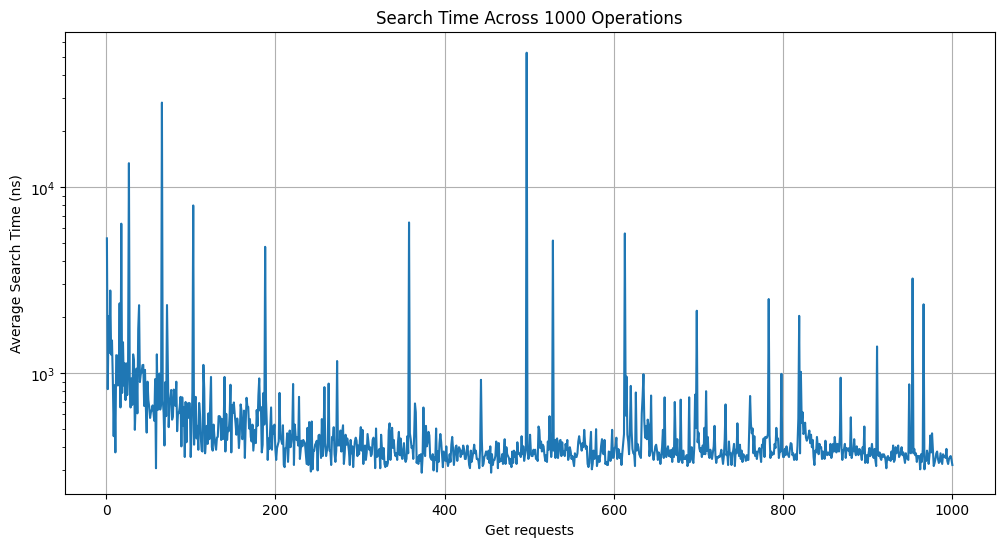

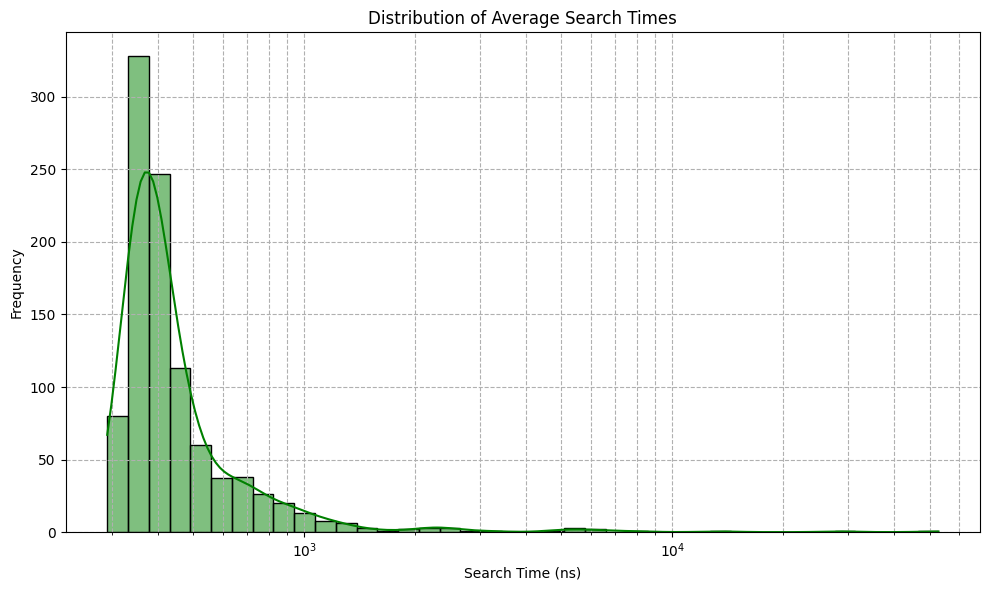

In [12]:
# Average search time of uuid keys across 1000 operations for AVL Trees

averaged_df = pd.read_csv('avl_trees/get/uuid_keys/avl_tree_average_get_metrics_1k.csv')

print(averaged_df['duration'].describe())

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Search Time Across 1000 Operations')
plt.xlabel('Get requests')
plt.ylabel('Average Search Time (ns)')
plt.yscale('log')
plt.grid(True)
plt.savefig('avl_tree_average_get_metrics_1k_lineplot.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
plt.title('Distribution of Average Search Times')
plt.xlabel('Search Time (ns)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.savefig('avl_tree_average_get_metrics_1k_histogram.png')
plt.show()

### Average search time of 1MB keys in Hash tables across 1000 operations

count    1.000000e+03
mean     2.752921e+05
std      1.282155e+05
min      1.164750e+05
25%      1.902042e+05
50%      2.400541e+05
75%      3.289707e+05
max      2.165362e+06
Name: duration, dtype: float64


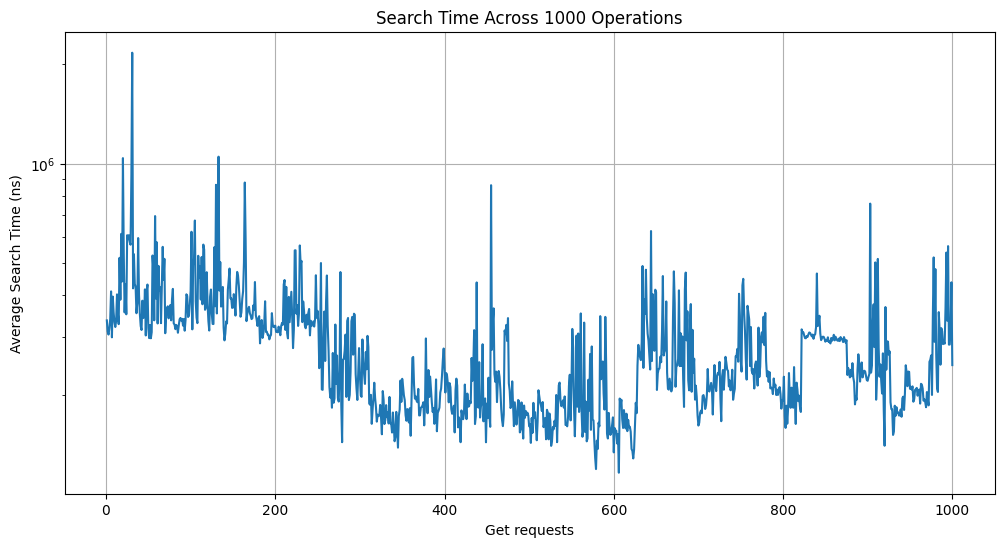

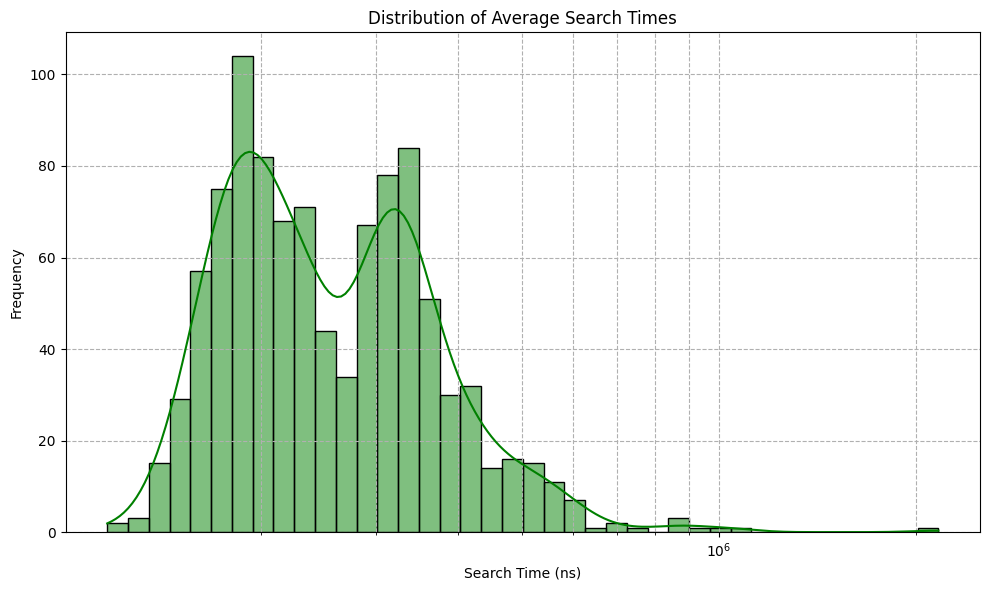

In [4]:
# Average search time of uuid keys across 1000 operations for AVL Trees

averaged_df = pd.read_csv('hash_tables/get/1MB_keys/hash_table_average_get_metrics_1k.csv')

print(averaged_df['duration'].describe())

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Search Time Across 1000 Operations')
plt.xlabel('Get requests')
plt.ylabel('Average Search Time (ns)')
plt.yscale('log')
plt.grid(True)
plt.savefig('hash_tables/get/1MB_keys/hash_table_average_get_metrics_1k_lineplot.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
plt.title('Distribution of Average Search Times')
plt.xlabel('Search Time (ns)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.savefig('hash_tables/get/1MB_keys/hash_table_average_get_metrics_1k_histogram.png')
plt.show()

### Average search time of 1MB keys in AVL Trees across 1000 operations

count    1.000000e+03
mean     3.684470e+05
std      2.108746e+05
min      1.844541e+05
25%      2.693509e+05
50%      3.170792e+05
75%      3.930885e+05
max      4.353746e+06
Name: duration, dtype: float64


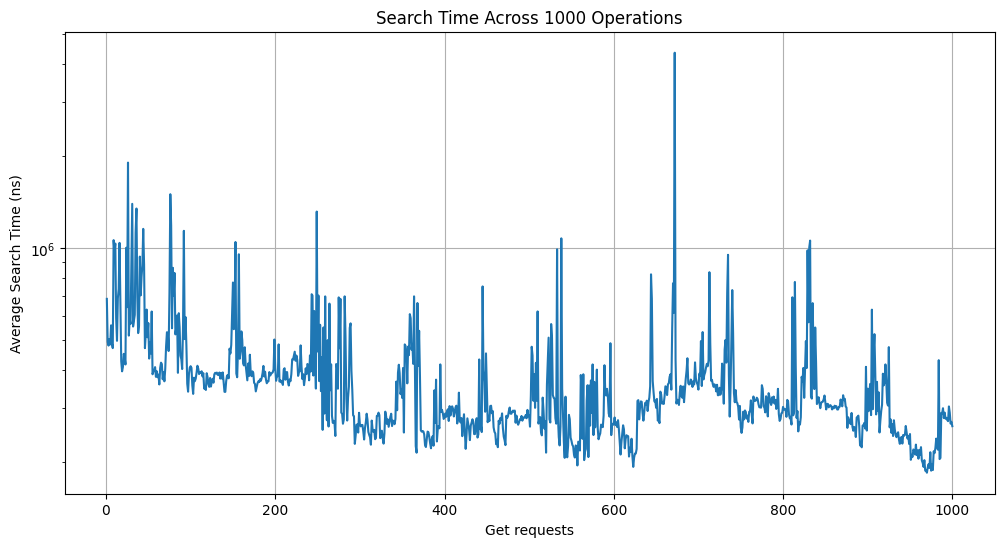

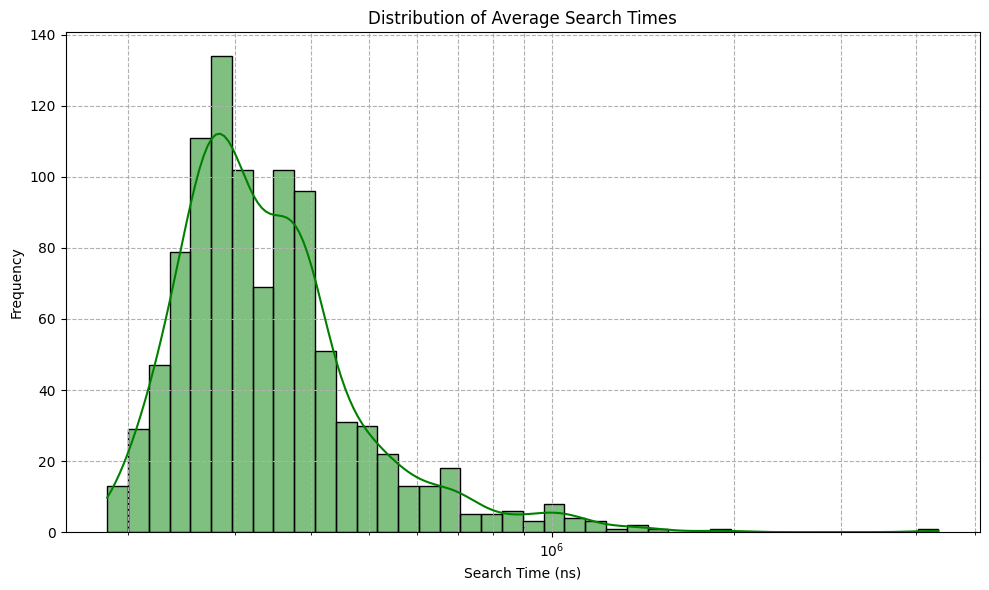

In [7]:
# Average search time of 1MB keys across 1000 operations for AVL Trees

averaged_df = pd.read_csv('avl_trees/get/1MB_keys/avl_tree_average_get_metrics_1k.csv')

print(averaged_df['duration'].describe())

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Search Time Across 1000 Operations')
plt.xlabel('Get requests')
plt.ylabel('Average Search Time (ns)')
plt.yscale('log')
plt.grid(True)
plt.savefig('avl_trees/get/1MB_keys/avl_tree_average_get_metrics_1k_lineplot.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
plt.title('Distribution of Average Search Times')
plt.xlabel('Search Time (ns)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.savefig('avl_trees/get/1MB_keys/avl_tree_average_get_metrics_1k_histogram.png')
plt.show()

### Average deletion time of uuid keys in Hash Tables across 1000 operations

count    1000.000000
mean      182.809000
std       191.806665
min        91.500000
25%       112.700000
50%       129.200000
75%       187.525000
max      4116.700000
Name: duration, dtype: float64


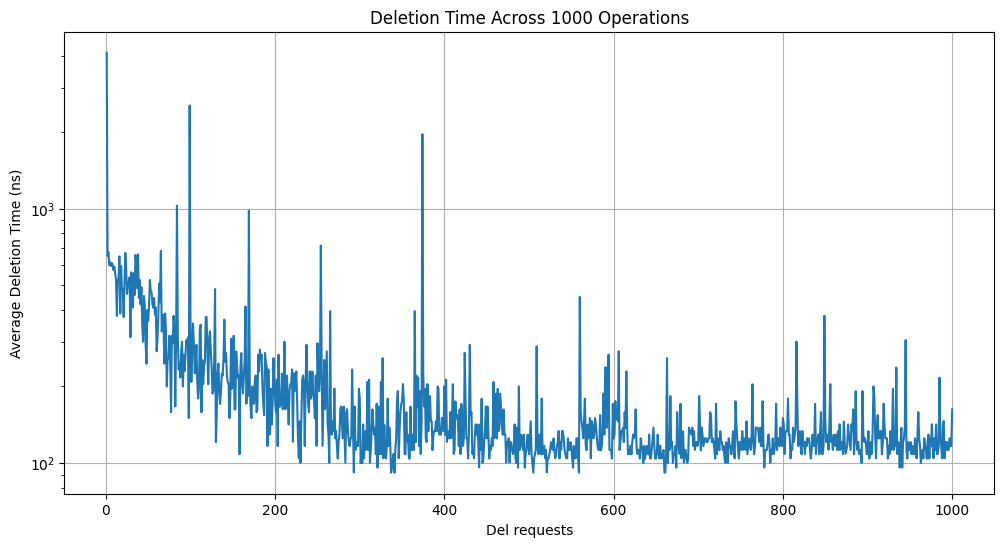

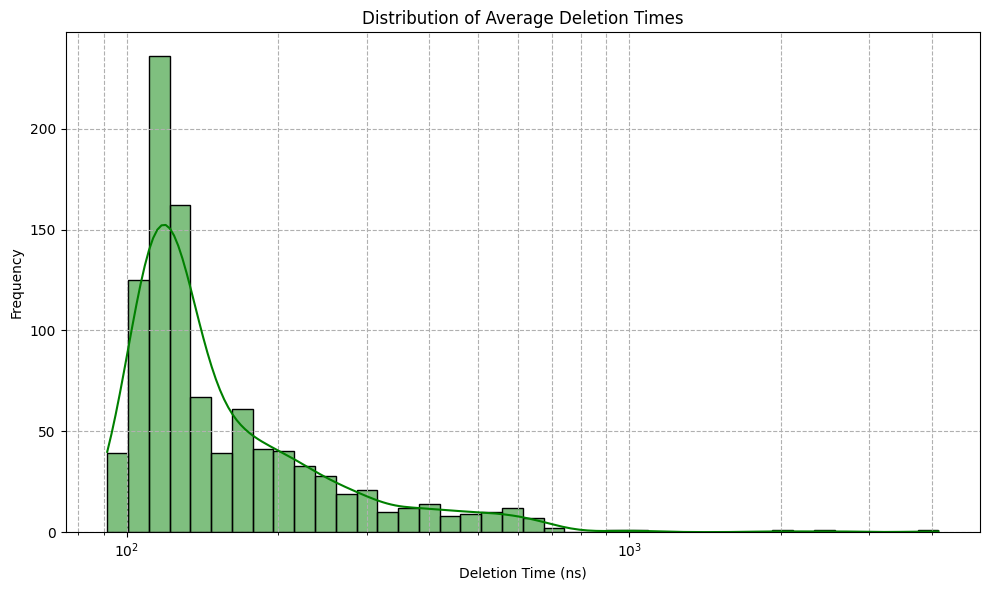

In [6]:
# Average deletion time of uuid keys across 1000 operations for Hash tables

averaged_df = pd.read_csv('hash_tables/del/uuid_keys/hash_table_average_del_metrics_1k.csv')

print(averaged_df['duration'].describe())

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Deletion Time Across 1000 Operations')
plt.xlabel('Del requests')
plt.ylabel('Average Deletion Time (ns)')
plt.yscale('log')
plt.grid(True)
plt.savefig('hash_tables/del/uuid_keys/hash_table_average_del_metrics_1k_lineplot.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
plt.title('Distribution of Average Deletion Times')
plt.xlabel('Deletion Time (ns)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.savefig('hash_tables/del/uuid_keys/hash_table_average_del_metrics_1k_histogram.png')
plt.show()

### Average deletion time of uuid keys in AVL Trees across 1000 operations

count     1000.000000
mean       467.100900
std        546.795663
min        283.400000
25%        337.300000
50%        362.400000
75%        434.425000
max      12133.200000
Name: duration, dtype: float64


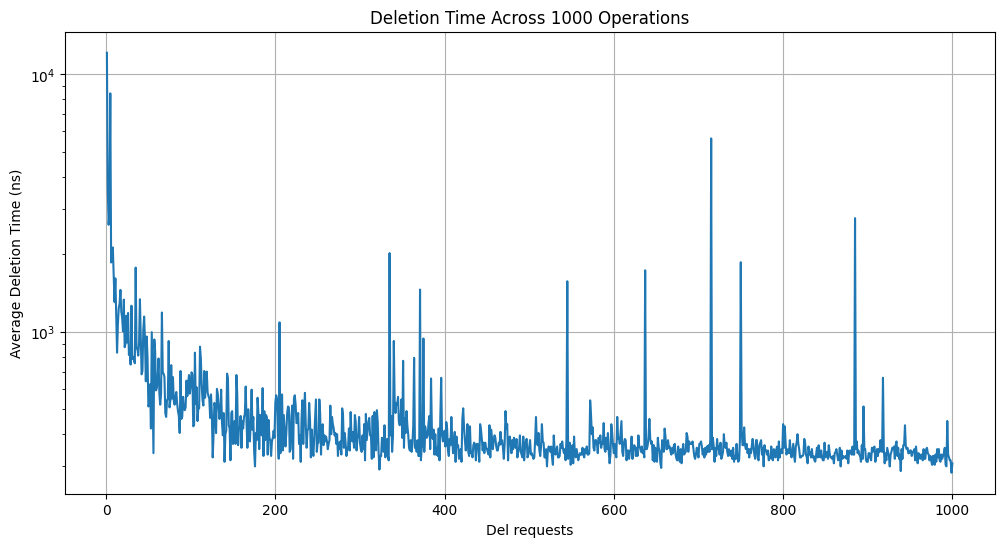

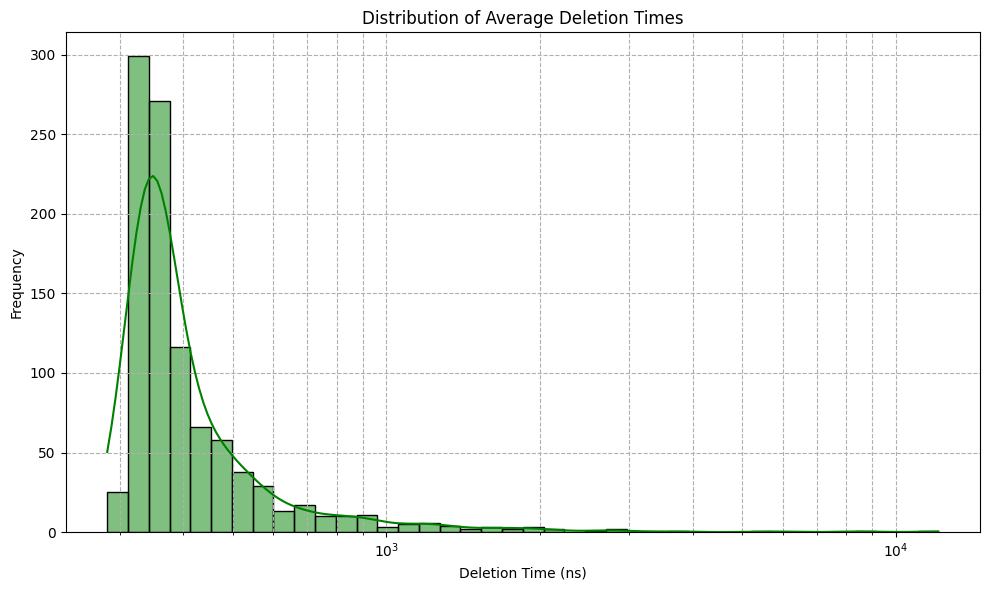

In [7]:
# Average deletion time of uuid keys across 1000 operations for AVL Trees

averaged_df = pd.read_csv('avl_trees/del/uuid_keys/avl_tree_average_del_metrics_1k.csv')

print(averaged_df['duration'].describe())

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Deletion Time Across 1000 Operations')
plt.xlabel('Del requests')
plt.ylabel('Average Deletion Time (ns)')
plt.yscale('log')
plt.grid(True)
plt.savefig('avl_trees/del/uuid_keys/avl_tree_average_del_metrics_1k_lineplot.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
plt.title('Distribution of Average Deletion Times')
plt.xlabel('Deletion Time (ns)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.savefig('avl_trees/del/uuid_keys/avl_tree_average_del_metrics_1k_histogram.png')
plt.show()

### Average deletion time of 1MB keys in Hash tables across 1000 operations

count    1.000000e+03
mean     2.217927e+05
std      1.321818e+05
min      9.158340e+04
25%      1.627364e+05
50%      2.104813e+05
75%      2.531584e+05
max      2.829712e+06
Name: duration, dtype: float64


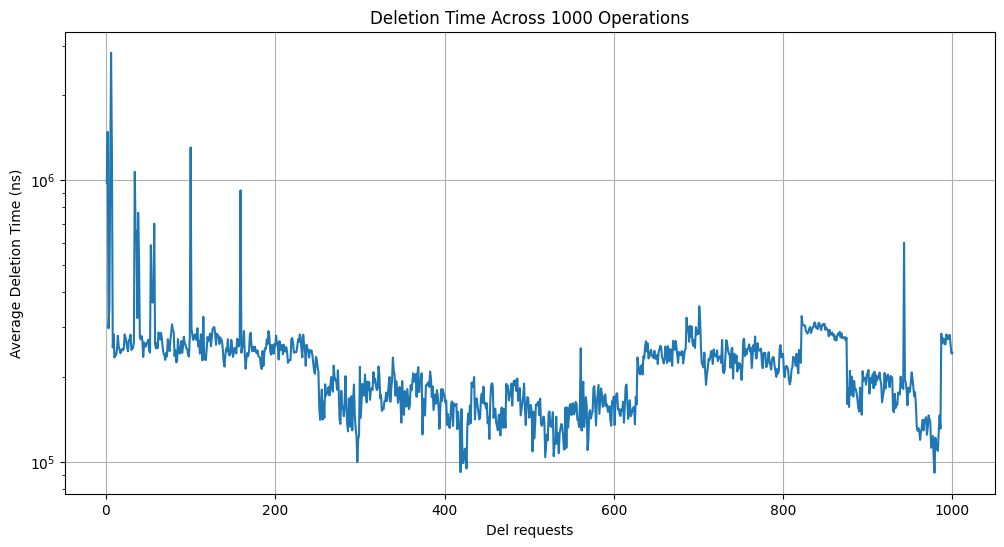

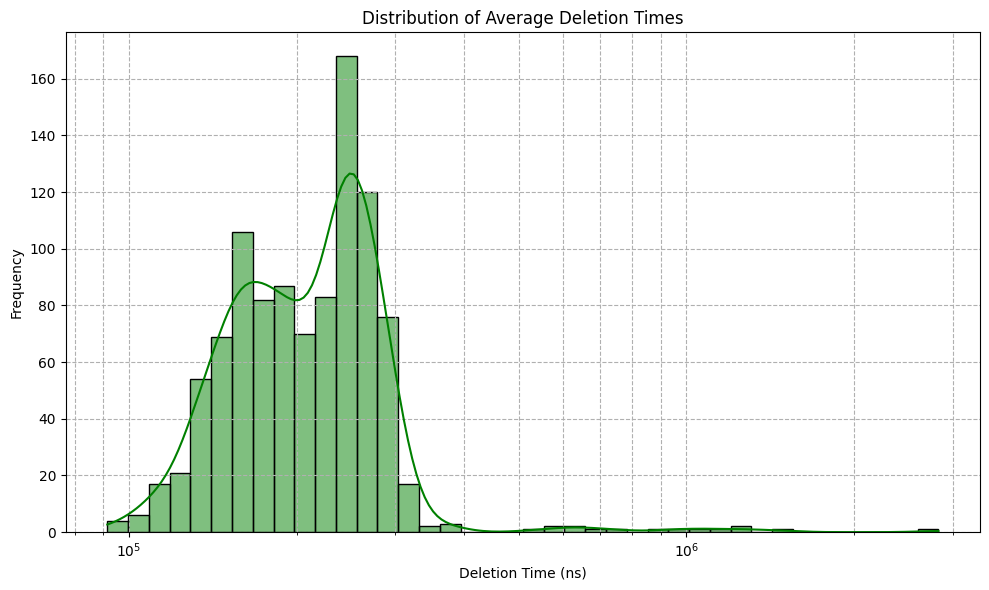

In [8]:
# Average deletion time of 1MB keys across 1000 operations for Hash tables

averaged_df = pd.read_csv('hash_tables/del/1MB_keys/hash_table_average_del_metrics_1k.csv')

print(averaged_df['duration'].describe())

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Deletion Time Across 1000 Operations')
plt.xlabel('Del requests')
plt.ylabel('Average Deletion Time (ns)')
plt.yscale('log')
plt.grid(True)
plt.savefig('hash_tables/del/1MB_keys/hash_table_average_del_metrics_1k_lineplot.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
plt.title('Distribution of Average Deletion Times')
plt.xlabel('Deletion Time (ns)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.savefig('hash_tables/del/1MB_keys/hash_table_average_del_metrics_1k_histogram.png')
plt.show()

### Average deletion time of 1MB keys in AVL Trees across 1000 operations

count    1.000000e+03
mean     2.836940e+05
std      1.605398e+05
min      1.433790e+05
25%      2.146616e+05
50%      2.702291e+05
75%      3.141032e+05
max      2.488058e+06
Name: duration, dtype: float64


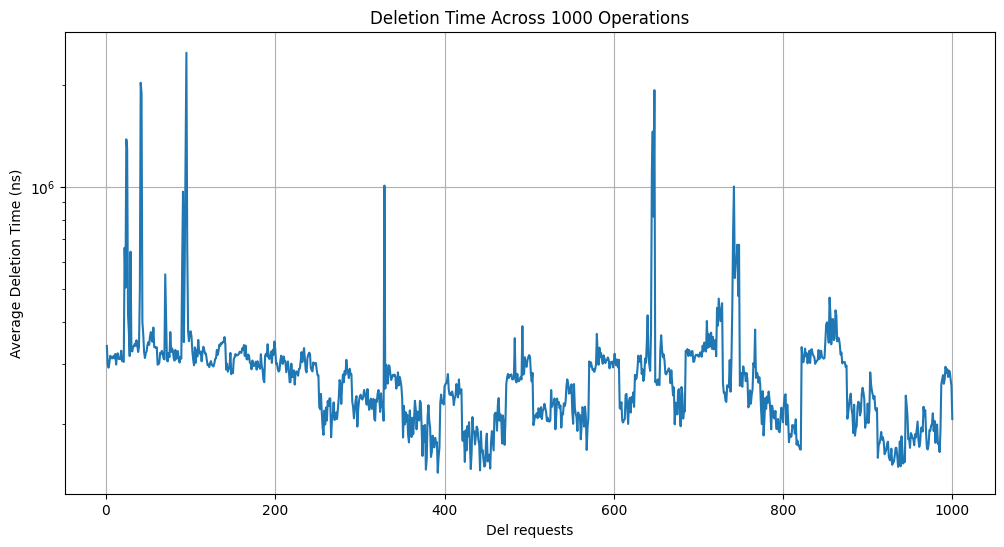

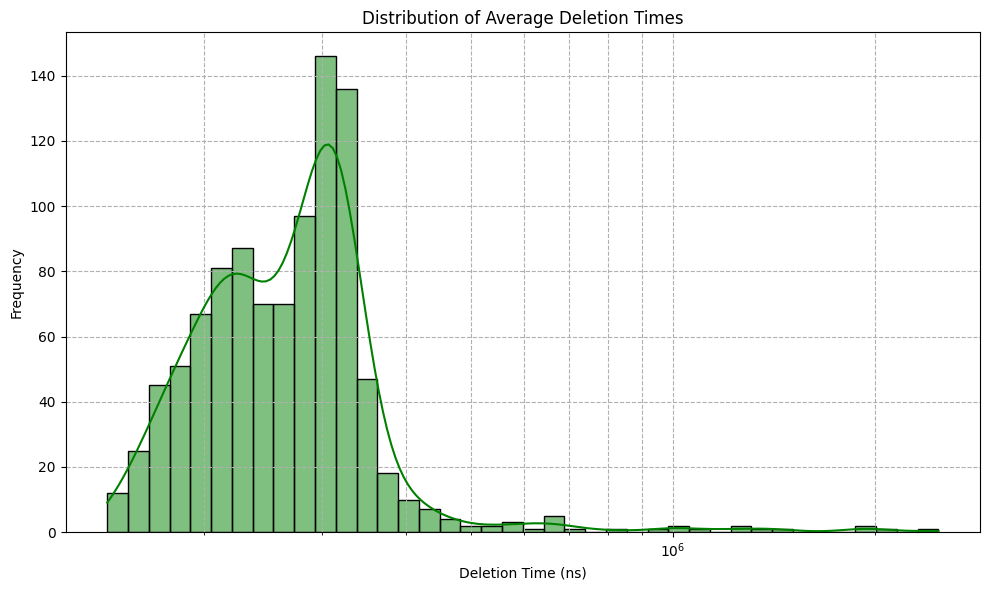

In [9]:
# Average deletion time of 1MB keys across 1000 operations for Hash tables

averaged_df = pd.read_csv('avl_trees/del/1MB_keys/avl_tree_average_del_metrics_1k.csv')

print(averaged_df['duration'].describe())

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Deletion Time Across 1000 Operations')
plt.xlabel('Del requests')
plt.ylabel('Average Deletion Time (ns)')
plt.yscale('log')
plt.grid(True)
plt.savefig('avl_trees/del/1MB_keys/avl_tree_average_del_metrics_1k_lineplot.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
plt.title('Distribution of Average Deletion Times')
plt.xlabel('Deletion Time (ns)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.savefig('avl_trees/del/1MB_keys/avl_tree_average_del_metrics_1k_histogram.png')
plt.show()